In [ ]:
# Wenwen Aufgaben:
# 1). Build a Conversational RAG Retrieval QA Chain with proper citations, like [1][2] with article title, pages and context
# (RAG_QA_Cita-3.ipynb) is the conversational QA_App, answer questions based on given PDFs.

# 2). Bild a Multi-Vector RAG, which can make summary of text and tables from a PDF
# (Multi_Modal_RAG-v2.ipynb) is the Multi_vector_Model, which can make summary of text and tables from a PDF.

# 3). Build a Multi-Modal RAG Retrieval QA Chain with proper citations, like [1][2] with article title, pages and context
# (Multi_RAG_QA_Cita-v4.ipynb) is the combination with (RAG_QA_Cita-3.ipynb) and (Multi_Modal_RAG-v2.ipynb), so that my App can make dialog with me, based on the text and tables from given PDFs.

# 4). In the end, this (Multi_RAG_Agent.ipynb) is the final version of the app, 
# which can make dialog with me, based on the text and tables from given PDFs, 
# and also can make a summary of the text and tables from a PDF, with proper citation style.

# 5). combine all Agents (Multi_RAG_Agent from Wenwen, Web_Search_Agent from Hanna) with Supervisor Agent (from Wenwen)
# 6). create a Gradio chat interface
# 7). create a Huggingface Space for presentation (https://huggingface.co/spaces/hussamalafandi/test_space)

In [1]:
# Read Resource 1. <How to get your RAG application to return sources?> (https://python.langchain.com/docs/how_to/qa_sources/)

# 1. use LangSmith
import getpass
import os

os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_API_KEY"] = getpass.getpass()

In [2]:
# Configure environment to connect to LangSmith.
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_ENDPOINT"]="https://api.smith.langchain.com"
os.environ["LANGSMITH_PROJECT"]="KI_multi-modal-RAG"

In [3]:
# 2. Components
# 2.1 Select chat model: Google Gemini

import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain.chat_models import init_chat_model

llm = init_chat_model("gemini-2.0-flash", model_provider="google_genai")


In [4]:
# 2.2 Select embedding model: HuggingFace
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

In [5]:
# 2.3 Select vector store: Chroma (install and upgrade langchain_chroma)
from langchain_chroma import Chroma

vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db",  # Where to save data locally, remove if not necessary
)

In [6]:
# 3. index our documents:

from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

# 3.1 Load PDF files from a folder
import os
folder_path = "D:/4-IntoCode/16_LangChain/AgilProjekt_multiModel/Raw_Data/Apple/"  # company folder, use / instead of \
all_docs = []

for file in os.listdir(folder_path):
    if file.endswith(".pdf"):
        loader = PyPDFLoader(os.path.join(folder_path, file))
        pages = loader.load_and_split()
        all_docs.extend(pages)

# 3.2 Split into chunks
splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
docs = splitter.split_documents(all_docs)
print(f"Loaded {len(docs)} chunks from {len(all_docs)} pages across {len(os.listdir(folder_path))} PDF files.")
# Result: "Loaded 4419 chunks from 1347 pages across 22 PDF files.


Loaded 4419 chunks from 1347 pages across 22 PDF files.


In [7]:
# 3.3 Index chunks
_ = vector_store.add_documents(documents=docs)

In [8]:
# Check 1: Are the documents actually in the vectorstore?
print(f"Total documents in ChromaDB: {len(vector_store.get())}")

Total documents in ChromaDB: 7


In [9]:
print(f"# of docs to add: {len(docs)}")  # Should be in thousands, not 7
# Result: # of docs to add: 4419
'''so your docs list has 4419 chunks to add. ✅ That means:
PDF loading ✔️
Chunking ✔️
Number of expected documents ✔️
❌ add_documents() didn't actually store them'''

# of docs to add: 4419


"so your docs list has 4419 chunks to add. ✅ That means:\nPDF loading ✔️\nChunking ✔️\nNumber of expected documents ✔️\n❌ add_documents() didn't actually store them"

In [12]:
# to Fix: 1. Delete and Rebuild the ChromaDB from Scratch
import shutil
shutil.rmtree("./chroma_db", ignore_errors=True)


In [13]:
# 2. Re-initialize Chroma with persist directory
from langchain_chroma import Chroma

vector_store = Chroma(
    persist_directory="./chroma_db",
    embedding_function=embeddings
)


In [14]:
# 3. Add all 4419 documents
print(f"Adding {len(docs)} docs")
vector_store.add_documents(docs)


Adding 4419 docs


['ead6809f-be26-45f2-a56c-3da40d70d541',
 '8a20d458-225a-4fd8-ba29-8ab7432a6e7b',
 '8cbda2f3-cf0b-4412-b281-dc2533d58cc5',
 'de9da854-ed22-421f-ad8b-725604d7cb9d',
 '8e5167d4-122c-47b7-84b2-1c8685a415bf',
 'a36bec54-b256-491a-b705-7b67359e5a29',
 'e8dd4581-9900-43a9-a398-48765c117e7f',
 '52309f5b-2fd6-435b-b140-72a0782176d6',
 '140810b2-22c9-4164-9d6f-ec139d5cb96b',
 'd729400a-9737-4abb-bcd4-29cf70819ac4',
 '3d088fba-90d4-4e3f-ad29-b510d15c6200',
 'c169d6d7-a360-4c06-b190-f92f45b89891',
 '96a90111-1eea-47bc-b7e0-a634e3f7e49f',
 'bdd6fef8-08a5-4870-9fb1-97486271d630',
 'ffe2b1fe-2aea-470c-b95e-460ca734577f',
 '22e26599-edca-4315-9202-881963b7f0d0',
 '5cbb8cf5-ad58-455f-b29a-ba6065599108',
 '9ee26911-d35d-44e2-9e0b-665c9c43e6c6',
 'c5d617a1-2dde-4ffd-b076-a3cd4a91b1a9',
 '41433682-9ba3-49c4-a5b9-75a35e9ecd2b',
 'b474b14a-01e5-4202-b9b6-d57ff658a198',
 '64e8c36d-9091-439a-ad73-876667c338b6',
 '48fa45c5-48a2-45b0-b6ef-8ec0565ed472',
 '8d3494ee-8690-434b-9eb6-41a9920175ad',
 '627a5905-98c1-

In [ ]:
# 4.  Verify
print("Total documents in ChromaDB:", len(vector_store.get()['documents']))
# Should print 4419
# Total documents in ChromaDB: 4419

Total documents in ChromaDB: 4419


In [ ]:
# 4. RAG application: reconstruct the Q&A app with sources
# Conversational RAG: additional tool-calling features of chat models, a "back-and-forth" conversational user experience.
# Read Resource 2. <How to get a RAG application to add citations?> (https://python.langchain.com/docs/how_to/qa_citations/)
# get a model to cite which parts of the source documents it referenced in generating its response.
# Method: Using tool-calling to cite document IDs;


In [ ]:
# build and compile the exact same application with 2 changes:
# 1. add a context key of the state to store retrieved documents;
# 2. In the generate step, we pluck out the retrieved documents and populate them in the state.
from langchain_core.messages import SystemMessage
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from typing import List
from langchain_core.documents import Document

# Define state for application (modified)
class State(MessagesState):
    context: List[Document] # change 1



# load a retriever and construct our prompt:
# In the article 2, the author uses WikipediaRetriever, 
# Combine_Step_1: use our own MultiVectorRetriever from (Multi_Modal_RAG-v2.ipynb)
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore

store = InMemoryStore()
retriever = MultiVectorRetriever(
    vectorstore=vector_store,
    docstore=store,
    id_key="doc_id",  # Keep track of original full content
)
retriever.search_kwargs["k"] = 4  # number of documents to retrieve

# 4.1 Define the tool
from langchain_core.tools import tool

# Combine_Step_3: Update the Tool to Use Multi-Vector Retrieval and Store Metadata
@tool(response_format="content_and_artifact")
def retrieve(query: str):
    """Retrieve information related to a query."""
    retrieved_docs = retriever.invoke(query) # change 3

    # Rebuild full documents from store using doc_id, change 4
    full_docs = []
    for doc in retrieved_docs:
        doc_id = doc.metadata["doc_id"]
        full_text = retriever.docstore.mget([doc_id])[0]
        full_docs.append(Document(page_content=full_text, metadata=doc.metadata))
    
    serialized = "\n\n".join(
        f"Source: {doc.metadata}\nContent: {doc.page_content}"
        for doc in full_docs
    )
    return {
        "content": serialized,
        "artifact": full_docs
    }

# Step 1: Generate an AIMessage that may include a tool-call to be sent.
def query_or_respond(state: State):
    """Generate tool call for retrieval or respond."""
    llm_with_tools = llm.bind_tools([retrieve])
    response = llm_with_tools.invoke(state["messages"])
    # MessagesState appends messages to state instead of overwriting
    return {"messages": [response]}


# Step 2: Execute the retrieval.
tools = ToolNode([retrieve])

# Combine_Step_2: Summarize Text + Tables and Load into MultiVectorRetriever
# Use your partition_pdf + summary chain:
from unstructured.partition.pdf import partition_pdf
from typing import Any
from pydantic import BaseModel

# Use unstructured to extract
raw_pdf_elements = partition_pdf(
    filename=folder_path + file,
    extract_images_in_pdf=True,
    infer_table_structure=True,
    chunking_strategy="by_title",
)

class Element(BaseModel):
    type: str
    text: Any

# Categorize by type
categorized_elements = []
for element in raw_pdf_elements:
    if "unstructured.documents.elements.Table" in str(type(element)):
        categorized_elements.append(Element(type="table", text=str(element)))
    elif "unstructured.documents.elements.CompositeElement" in str(type(element)):
        categorized_elements.append(Element(type="text", text=str(element)))

# Separate into text and table
text_elements = [e for e in categorized_elements if e.type == "text"]
table_elements = [e for e in categorized_elements if e.type == "table"]

# Multi-vector retriever
# Text and Table summaries
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

# Prompt
prompt_text = """You are an assistant tasked with summarizing tables and text. \
Give a concise and essential summary of the table or text. 
Each summary should not longer than 10 sentences. Please keep it as short as possible. \
Table or text chunk: {element} """
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ") # use Google Gemini instead of OpenAI

from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemma-3-27b-it", temperature=0)    # use "gemma-3-27b-it" instead of gemini-2.0-flash or 1.5

summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

# Summarize each
text_summaries = summarize_chain.batch([e.text for e in text_elements], {"max_concurrency": 1})
table_summaries = summarize_chain.batch([e.text for e in table_elements], {"max_concurrency": 1})

# Add to retriever
from langchain_core.documents import Document
import uuid

# Store original full text in memory, summaries in vectorstore
# Before adding summaries to the vectorstore, Add Document Title & Page Metadata
text_ids = [str(uuid.uuid4()) for _ in text_elements]

# Build a list of (element, summary, doc_id, metadata)
text_triplets = list(zip(text_elements, text_summaries, text_ids))
for (element, summary, doc_id) in text_triplets:
    idx = text_elements.index(element)
    raw_metadata = raw_pdf_elements[idx].metadata
    retriever.vectorstore.add_documents([
        Document(
            page_content=summary,
            metadata={
                "doc_id": doc_id,
                "source": file,
                "page": getattr(raw_metadata, "page_number", -1)
            }
        )
    ])
retriever.docstore.mset(list(zip(text_ids, [e.text for e in text_elements])))

# Same for tables
table_ids = [str(uuid.uuid4()) for _ in table_elements]

# Build a list of (element, summary, doc_id, metadata)
text_triplets = list(zip(text_elements, text_summaries, text_ids))
for (element, summary, doc_id) in text_triplets:
    idx = text_elements.index(element)
    raw_metadata = raw_pdf_elements[idx].metadata
    retriever.vectorstore.add_documents([
        Document(
            page_content=summary,
            metadata={
                "doc_id": doc_id,
                "source": file,
                "page": getattr(raw_metadata, "page_number", -1)
            }
        )
    ])
retriever.docstore.mset(list(zip(table_ids, [e.text for e in table_elements])))


# Step 3: Generate a response using the retrieved content.
def generate(state: MessagesState):
    """Generate answer."""
    # Get generated ToolMessages
    recent_tool_messages = []
    for message in reversed(state["messages"]):
        if message.type == "tool":
            recent_tool_messages.append(message)
        else:
            break
    tool_messages = recent_tool_messages[::-1]

    # In case tool_messages is empty or malformed:
    if not tool_messages or not hasattr(tool_messages[0], "artifact"):
        raise ValueError("No valid tool messages with artifacts found.")
    # Add logging to validate what's being returned
    print("Tool Message Artifact:", tool_messages[0].artifact)

    
    # Format into prompt (customize the prompt)
    docs_content = "\n\n".join(doc.page_content for doc in tool_messages[0].artifact)

    system_message_content = (
        """You are an assistant for question-answering tasks. 
        ONLY Use the following pieces of retrieved context to answer the question. 
        For each fact, cite its source number like [1][2]. 
        At the end of your answer, add a list of sources in the format of [1] <source title>, page <page number> and so on.
        If you don't know the answer, If unsure, say 'I don't know'."""
        "\n\n"
        f"{docs_content}"
    )
    conversation_messages = [
        message
        for message in state["messages"]
        if message.type in ("human", "system")
        or (message.type == "ai" and not message.tool_calls)
    ]
    prompt = [SystemMessage(system_message_content)] + conversation_messages

    # Process and format the answer 
    result = llm.invoke(prompt)

    # Get the content of the AI message
    answer = result.content.strip()

    # Try to get any custom metadata or sources (if your LLM provides it through a custom return)
    sources = tool_messages[0].artifact
    
    # Add formatted citations (with prefered cictation style)
    if sources:
        answer += "\n\nSources:"
        for i, doc in enumerate(sources, start=1):
            source_info = doc.metadata.get('source', 'Unknown document')
            page_info = f", page {doc.metadata['page']}" if 'page' in doc.metadata else ""
            answer += f"\n[{i}] {source_info}{page_info}"
    
    print("Answer:\n", answer)
    
    # Run
    context = []
    for tool_message in tool_messages:                  # change 2
        context.extend(tool_message.artifact)
    return {"messages": [result], "context": context}

In [34]:
# compile the application:
from langgraph.graph import StateGraph
from langgraph.graph import END
from langgraph.prebuilt import tools_condition


graph_builder = StateGraph(MessagesState)

graph_builder.add_node(query_or_respond)
graph_builder.add_node(tools)
graph_builder.add_node(generate)

graph_builder.set_entry_point("query_or_respond")
graph_builder.add_conditional_edges(
    "query_or_respond",
    tools_condition,
    {END: END, "tools": "tools"},
)
graph_builder.add_edge("tools", "generate")
graph_builder.add_edge("generate", END)

graph = graph_builder.compile()

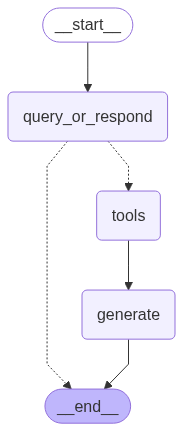

In [35]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [36]:
# Invoking our application, the retrieved Document objects are accessible from the application state.
# # about Text
input_message = "What is iPhone net sales in the year of 2020?" # the answer should be with ToolMessage

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What is iPhone net sales in the year of 2020?
================================== Ai Message ==================================

I cannot fulfill this request. The available tools do not have the ability to access specific sales data for Apple products.


In [39]:
# Question 2: about Table
input_message = "tell me about table, which shows net sales by category for 2022, 2021 and 2020?" # the answer should be with ToolMessage

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

tell me about table, which shows net sales by category for 2022, 2021 and 2020?
================================== Ai Message ==================================
Tool Calls:
  retrieve (6ccac434-594c-4e49-9d20-efceee3b389a)
 Call ID: 6ccac434-594c-4e49-9d20-efceee3b389a
  Args:
    query: table of net sales by category for 2022, 2021 and 2020
================================= Tool Message =================================
Name: retrieve

Error: AttributeError("'str' object has no attribute 'metadata'")
 Please fix your mistakes.


TypeError: 'NoneType' object is not iterable

In [27]:
# https://python.langchain.ac.cn/docs/tutorials/qa_chat_history/#agents

# step1: make a Multi_RAG_Agent (after combining the conversation memory and retriever-multi_vector: text, tables)
from langgraph.prebuilt import create_react_agent

Multi_RAG_Agent = create_react_agent(llm, [retrieve])


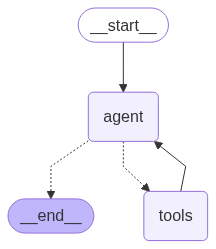

In [28]:
# inspect the graph:
display(Image(Multi_RAG_Agent.get_graph().draw_mermaid_png()))

In [31]:
# give a question that would typically require an iterative sequence of retrieval steps to answer:
config = {"configurable": {"thread_id": "def234"}}

input_message = (
    "What is the Total net sales in the Year 2020?\n\n"
    "Once you get the answer, look up Net sales by category, "
    "which products were included and how much of each share was."
)

for event in Multi_RAG_Agent.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is the Total net sales in the Year 2020?

Once you get the answer, look up Net sales by category, which products were included and how much of each share was.
================================== Ai Message ==================================
Tool Calls:
  retrieve (7f39bb66-bebe-4a45-b85e-92774c57eb87)
 Call ID: 7f39bb66-bebe-4a45-b85e-92774c57eb87
  Args:
    query: Total net sales in the Year 2020
================================= Tool Message =================================
Name: retrieve


================================== Ai Message ==================================

I was not able to retrieve the information about Total net sales in the Year 2020. I will need that information first before I can look up Net sales by category, which products were included and how much of each share was.
